# self analysis

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

**The issue is sns.load_dataset() only works with built-in seaborn datasets, not your custom CSV file.**

In [2]:
spoti =pd.read_csv('spotify_churn_dataset.csv') 

In [3]:
spoti.sample(100)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
5161,5162,Male,27,AU,Free,255,22,0.01,Desktop,25,0,0
6204,6205,Female,17,DE,Free,115,8,0.20,Mobile,42,0,0
2392,2393,Male,37,US,Family,51,67,0.08,Mobile,0,1,0
1922,1923,Female,40,UK,Premium,27,48,0.41,Mobile,0,1,1
4048,4049,Other,27,CA,Student,160,20,0.51,Desktop,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7150,7151,Other,45,FR,Premium,57,62,0.01,Web,0,1,0
3652,3653,Male,24,PK,Free,226,29,0.31,Mobile,35,0,0
4242,4243,Male,20,PK,Free,102,85,0.09,Mobile,39,0,0
5025,5026,Male,19,DE,Premium,59,85,0.12,Desktop,0,1,0


** but used in this ways **

<Axes: xlabel='gender', ylabel='age'>

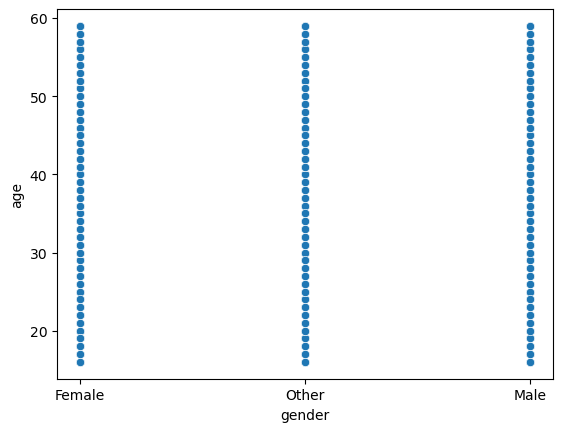

In [4]:
sns.scatterplot(x=spoti['gender'], y=spoti['age'])

In [5]:
spoti['gender'].value_counts()

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

# look carefully 
** all gender are very close to each other **  
that why is linear 


<Axes: xlabel='age', ylabel='listening_time'>

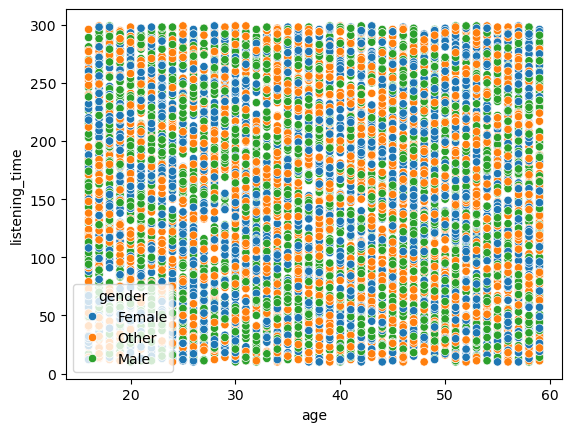

In [6]:
sns.scatterplot(data=spoti, x='age', y='listening_time',hue='gender')

# hexabin plot  
better use this

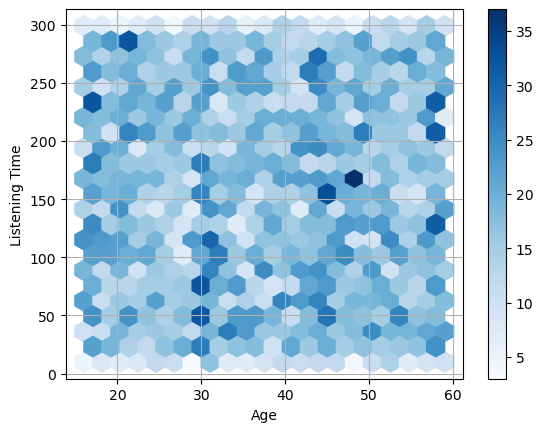

In [7]:
plt.hexbin(spoti['age'], spoti['listening_time'], gridsize=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Listening Time')
plt.grid()

# BarPlot (NUmerical- Categorical)

<Axes: xlabel='offline_listening', ylabel='subscription_type'>

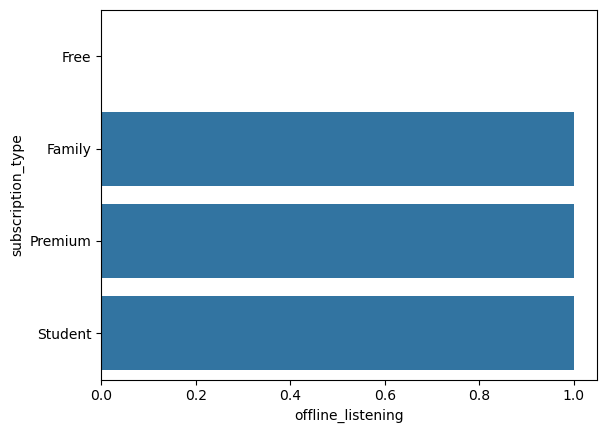

In [8]:
# sns.barplot(titanic['Pclass'],titanic['Age'],hue=titanic['Sex'])


sns.barplot(x=spoti['offline_listening'],y=spoti['subscription_type'],)

<Axes: xlabel='subscription_type', ylabel='listening_time'>

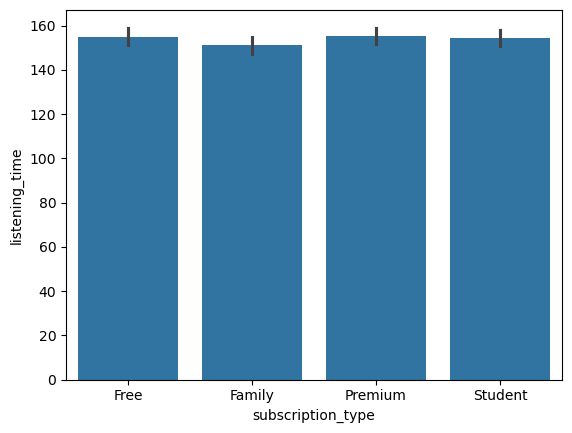

In [9]:
sns.barplot(data=spoti, x='subscription_type', y='listening_time')

i can't draw any data from it 


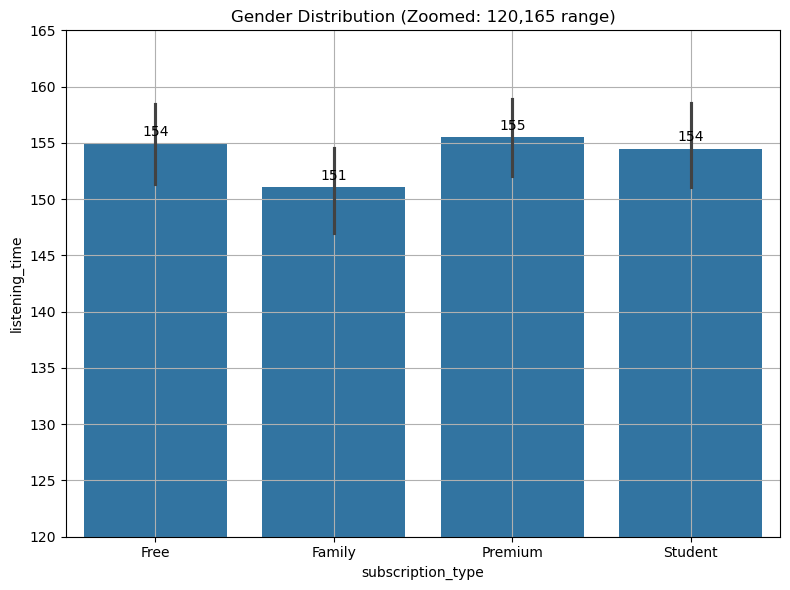

Exact gender counts are as follows:
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=spoti, x='subscription_type', y='listening_time')
ax.set_ylim(120,165)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Gender Distribution (Zoomed: 120,165 range)')
plt.tight_layout()
plt.grid()
plt.show()

print("Exact gender counts are as follows:")
print(spoti['gender'].value_counts())

<Axes: xlabel='gender', ylabel='songs_played_per_day'>

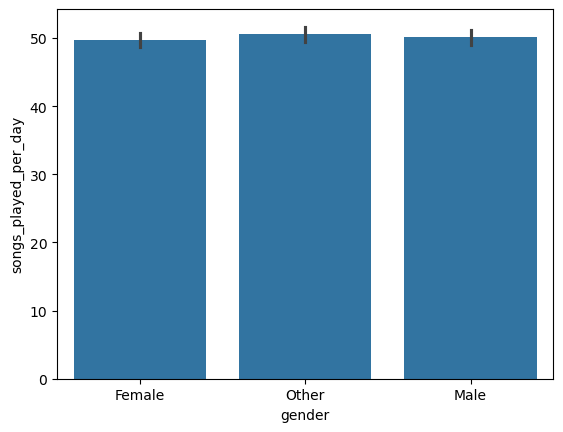

In [11]:
sns.barplot(data=spoti, x='gender', y='songs_played_per_day')

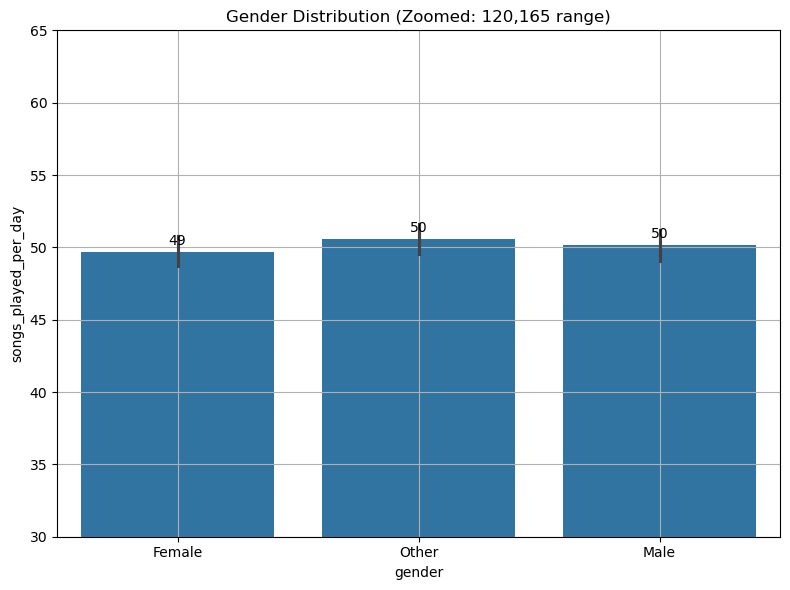

In [12]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=spoti, x='gender', y='songs_played_per_day')
ax.set_ylim(30,65)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Gender Distribution (Zoomed: 120,165 range)')
plt.tight_layout()
plt.grid()
plt.show()


<Axes: xlabel='device_type', ylabel='songs_played_per_day'>

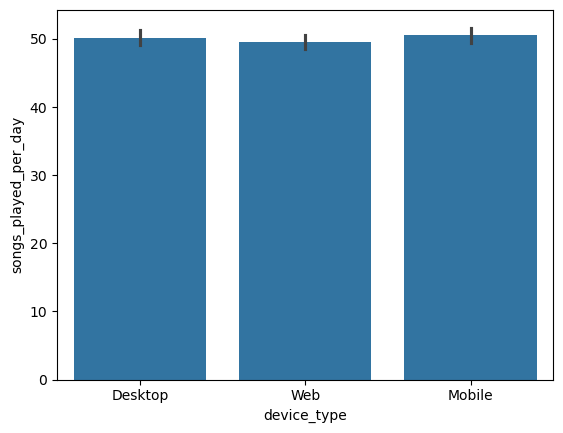

In [13]:
sns.barplot(data=spoti, x='device_type', y='songs_played_per_day')

sns.barplot(data=spoti, x='device_type', y='songs_played_per_day')

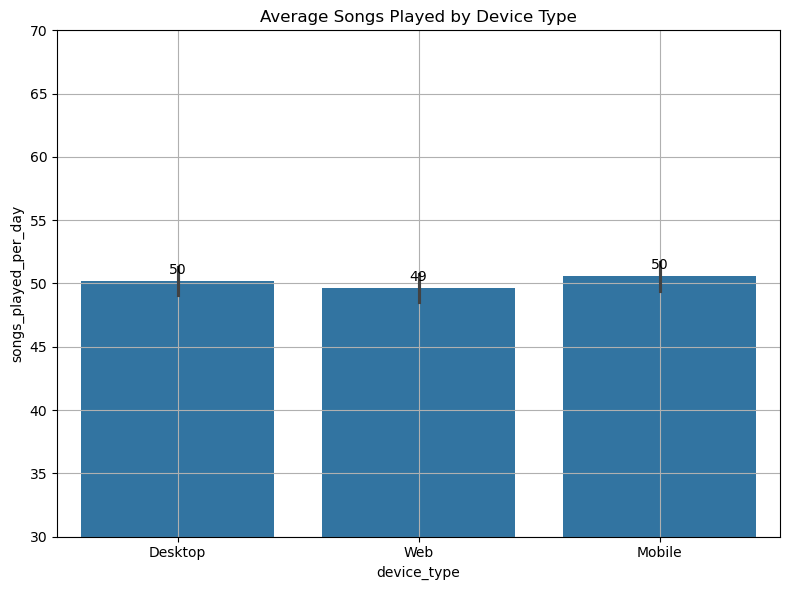

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=spoti, x='device_type', y='songs_played_per_day')  # Remove spoti[] 
ax.set_ylim(30, 70)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Average Songs Played by Device Type')  # Fixed title
plt.tight_layout()
plt.grid()
plt.show()


<Axes: xlabel='country', ylabel='songs_played_per_day'>

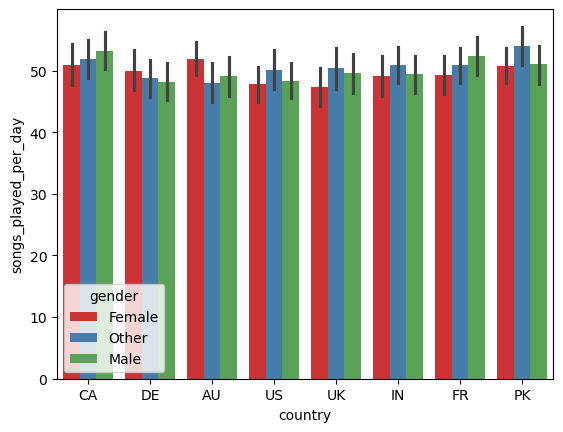

In [18]:
sns.barplot(x = spoti['country'], y = spoti['songs_played_per_day'],hue=spoti['gender'],palette='Set1')

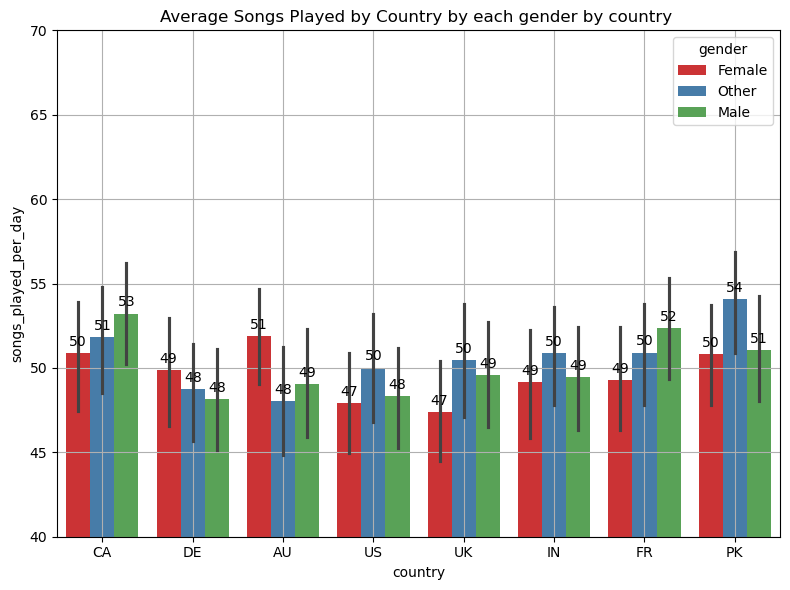

In [22]:
plt.figure(figsize=(8, 6))
ax =sns.barplot(x = spoti['country'], y = spoti['songs_played_per_day'],hue=spoti['gender'],palette='Set1') # Remove spoti[] 
ax.set_ylim(40, 70)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Average Songs Played by Country by each gender by country ')  # Fixed title
plt.tight_layout()
plt.grid()
plt.show()

# 3 box Plot  (Categorical vs Numerical  )

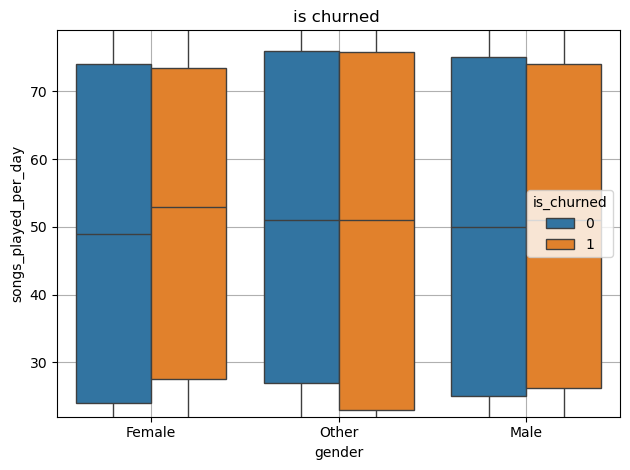

In [27]:
#sns.boxplot(x = titanic['Sex'],y= titanic['Age'],palette='Set1',hue=titanic['Survived'])

ax = sns.boxplot(x = spoti['gender'], y =spoti['songs_played_per_day'] ,hue=spoti['is_churned'])
ax.set_ylim(22, 79)
plt.title('is churned ')  # Fixed title
plt.tight_layout()
plt.grid()
plt.show()



# Displot ( Numberical -catergroical )

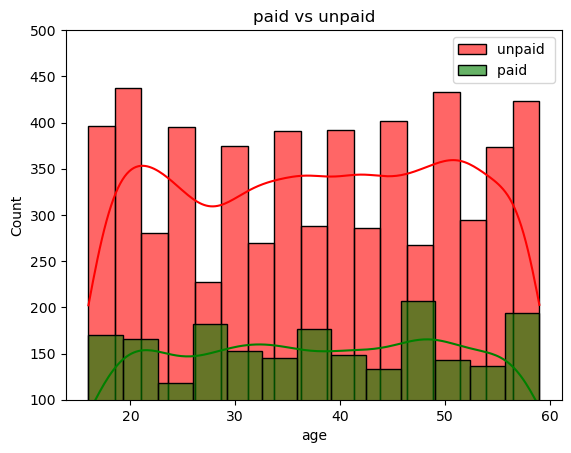

In [34]:
# For newer seaborn versions
ax=sns.histplot(spoti[spoti['is_churned']==0]['age'], label='unpaid ', kde=True, color='red', alpha=0.6)
ax=sns.histplot(spoti[spoti['is_churned']==1]['age'], label='paid ', kde=True, color='Green', alpha=0.6)
ax.set_ylim(100,500)
plt.legend()
plt.title('paid vs unpaid')
plt.show()

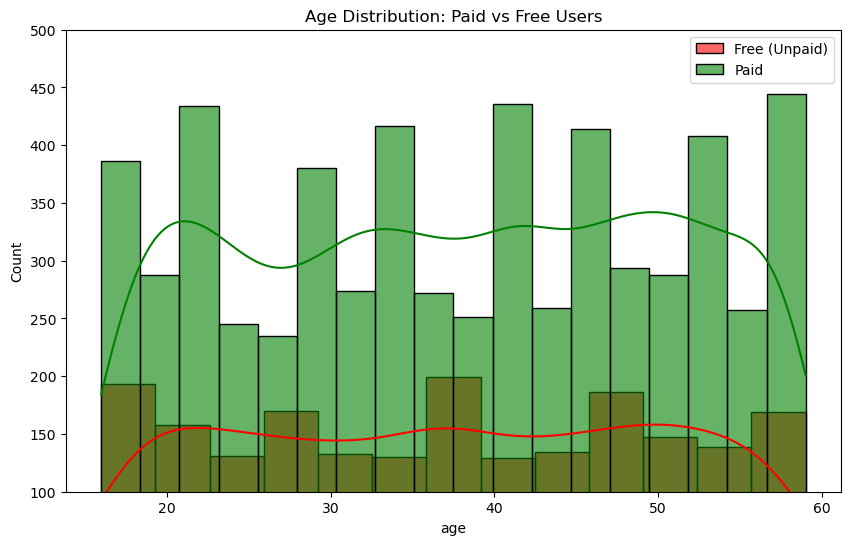